In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
theta=np.loadtxt("esp_cara_cobre_LIF.txt", usecols=0)
I=np.loadtxt("esp_cara_cobre_LIF.txt", usecols=1)
I=I[theta>5.8]
I=I/sum(I)
theta=theta[theta>5.8]



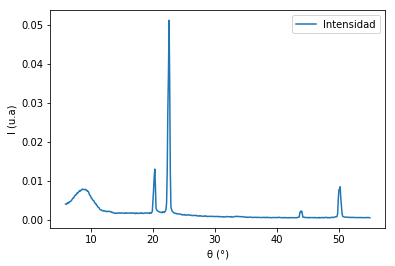

In [21]:
plt.figure(figsize=(6,4))
plt.plot(theta, I, label='Intensidad')
plt.xlabel('\u03b8 (°)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('inteanguloLiF.png')

In [22]:
d=2.04E-10

In [23]:
landa=2*d*np.sin(theta*np.pi/180)
landa=landa*(10**10)

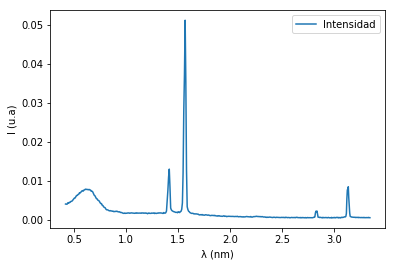

In [24]:
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('intelongLiF.png')

In [25]:
Ialp=max(I)
Ibet=max(I[landa<1.5])
Kalp=landa[I==Ialp][0]
Kbet=landa[I==Ibet][0]

In [26]:
Kalp, Kbet

(1.567924916451999, 1.415497458418884)

0.007499999999999951

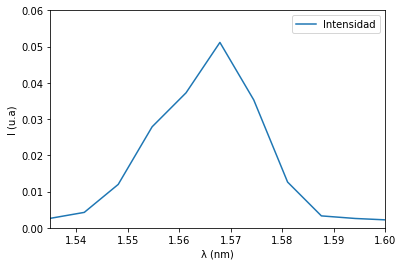

In [27]:
#Incertidumbres Kalph
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.535,1.6,0,0.06])
plt.legend()
sigmaAlp=abs(1.560-1.575)/2
sigmaAlp
#Incertidumbre Kalph=0.007 nm

0.007499999999999951

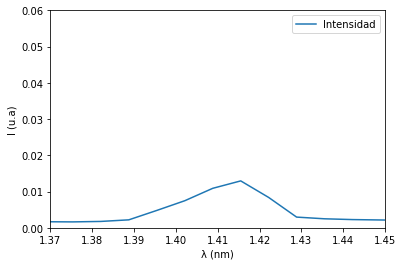

In [28]:
#Incertidumbres Kbet
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.37,1.45,0,0.06])
plt.legend()
sigmaBet=abs(1.405-1.420)/2
sigmaBet
#Incertidumbre Kbet=0.007 nm

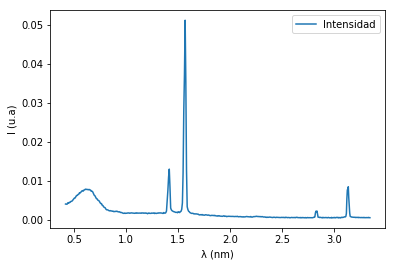

In [29]:
#Analisis de segundo orden
landaV=landa
IV=I
plt.figure(figsize=(6,4))
plt.plot(landaV, IV, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()

In [30]:
landa=landaV[landaV>2.5]*0.5
I=IV[landaV>2.5]

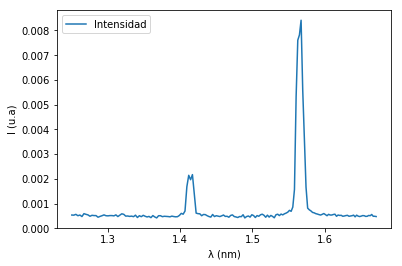

In [31]:
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()

1.414

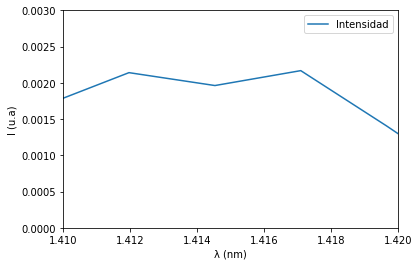

In [32]:
#Beta
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.41,1.42,0,0.003])
plt.legend()
Kbet2=1.414
Kbet2

1.566

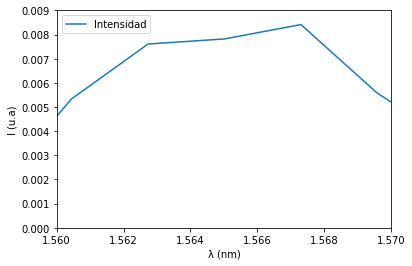

In [33]:
#Alpha
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.56,1.57,0,0.009])
plt.legend()
Kalp2=1.566
Kalp2

In [34]:
longAlp=(Kalp+Kalp2)/2
longBet=(Kbet+Kbet2)/2
h=6.62607004E-34
c=299792458
e=1.60217662E-19
Ealp=h*c/(longAlp*(10**-10))/e
Ebet=h*c/(longBet*(10**-10))/e
print('La longitud de onda de Ka dio', longAlp,'+- 0.007', 'y la de Kb', longBet, '+- 0.007')

La longitud de onda de Ka dio 1.5669624582259996 +- 0.007 y la de Kb 1.414748729209442 +- 0.007


In [35]:
print('Ka=', 1.567,'+-0.007 y Kb=', 1.415, 'nm')

Ka= 1.567 +-0.007 y Kb= 1.415 nm


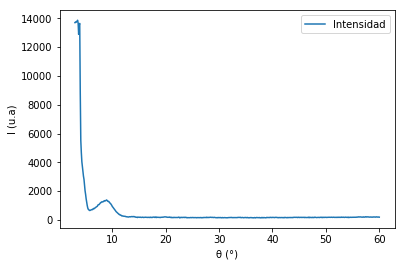

In [36]:
#Análisis para el cristal KBr
theta=np.loadtxt("esp_cara_cobre_KBr.txt", usecols=0)
I=np.loadtxt("esp_cara_cobre_KBr.txt", usecols=1)
plt.figure(figsize=(6,4))
plt.plot(theta, I, label='Intensidad')
plt.xlabel('\u03b8 (°)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('inteanguloKBr.png')
